# BigMart Sales Prediction Project
-- Kiran Patil

<hr style="margin-bottom: 40px;">

<img src="artifacts/images/bigmart.jpg"
    style="width:250px; float: right; margin: 0 40px 40px 40px;"></img>

# 1. Problem Statement


To develop a predictive model for estimating the sales of 1559 products across 10 BigMart stores, utilizing the 2013 sales data and predefined attributes for each product and store.

# 2. Hypothesis Generation

1. **Store Location Impact:** Hypothesize that the location of a store influences the sales of products, with certain cities or regions exhibiting higher demand.

2. **Store Size Effect:** Hypothesize that larger stores may have a higher sales volume compared to smaller ones.

3. **Promotion Influence:** Assume that products under promotional activities have a significant impact on sales.

4. **Product Visibility:** Assume that products placed at more visible locations within a store attract higher sales.

5. **Seasonal Variation:** Hypothesize that certain products experience higher sales during specific seasons.

6. **Brand Loyalty:** Assume that established brands may have a more consistent and higher sales volume compared to newer or less-known brands.

7. **Product Price Sensitivity:** Hypothesize that changes in product prices directly affect sales, with customers being more or less sensitive to price variations.

8. **Store Type Impact:** Assume that the type of store (grocery, supermarket, etc.) has an impact on the sales pattern of products.

9. **Product Shelf Life:** Hypothesize that products with a longer shelf life may have more consistent sales.

10. **Consumer Demographics:** Assume that the demographics of the cities or regions where stores are located influence the types of products and sales patterns.

# 3. Loading Libraries and Data

In [1]:
# for data manipulation and eda
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# to perform feature encoding
from sklearn.preprocessing import LabelEncoder, StandardScaler

# for train test split
from sklearn.model_selection import train_test_split

# !pip install xgboost

# for model traning
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
# load the data 
train = pd.read_csv("artifacts/datasets/Train.csv")
predict_for = pd.read_csv("artifacts/datasets/Test.csv")

# for data manipulation and cleaning
df = train.copy()

# 4. Exploratory Data Analysis
### 4.1 Univariate Analysis and Bivariate Analysis is done using powerBI dashboards
-- Lets do basic data exploration and data cleaning

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df.head(8)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636


### Observation:
    - Item_Weight and Outlet_Size  have missing values

In [5]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [6]:
df["Item_Identifier"].unique

<bound method Series.unique of 0       FDA15
1       DRC01
2       FDN15
3       FDX07
4       NCD19
        ...  
8518    FDF22
8519    FDS36
8520    NCJ29
8521    FDN46
8522    DRG01
Name: Item_Identifier, Length: 8523, dtype: object>

In [7]:
df["Item_Identifier"].nunique()

1559

In [8]:
# Check if there are any duplicates
are_duplicates = df.duplicated().any()

if are_duplicates:
    print("There are duplicates in the df")
else:
    print("All values in the dataframe df are unique.")

All values in the dataframe df are unique.


In [9]:
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


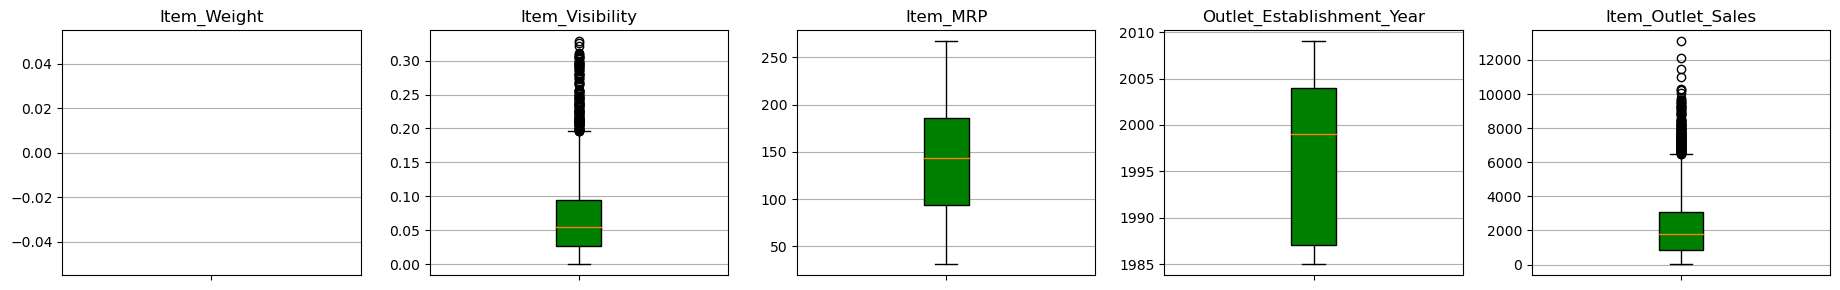

In [10]:
num_vars = train.select_dtypes(include='number')

fig, axes = plt.subplots(nrows=1,ncols=5) # create figure and axes
axes = axes.flatten() # Flatten the axes array for easy iteration
for i,col in enumerate(num_vars):
    ax = axes[i]
    box = ax.boxplot(train[col], patch_artist=True)
    box['boxes'][0].set_facecolor('green')
    ax.set_xticklabels([])
    ax.set_title(col)
    ax.yaxis.grid(True)

fig.set_size_inches(18.5,3)
plt.tight_layout()
plt.show()

In [11]:
# Item_Weight
df["Item_Weight"].isnull().sum()

1463

Choosing mean for imputation.
Missing values in 'Item_Weight' column after imputation: 0


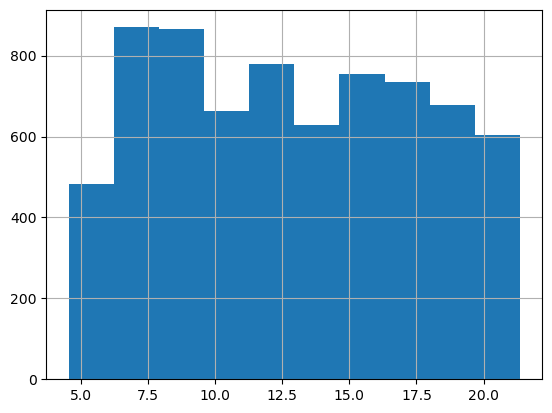

In [12]:
df['Item_Weight'].hist()

# Choose mean or median based on the distribution
if df['Item_Weight'].isnull().sum() > 0:
    if df['Item_Weight'].skew() > 0.5:  # threshold for skewness
        impute_value = df['Item_Weight'].median()
        print("Choosing median for imputation.")
    else:
        impute_value = df['Item_Weight'].mean()
        print("Choosing mean for imputation.")

    # Impute missing values with chosen imputation value
    df['Item_Weight'].fillna(impute_value, inplace=True)

# Verify if there are still any missing values in 'Item_Weight'
missing_values_after_imputation = df['Item_Weight'].isnull().sum()
print(f"Missing values in 'Item_Weight' column after imputation: {missing_values_after_imputation}")

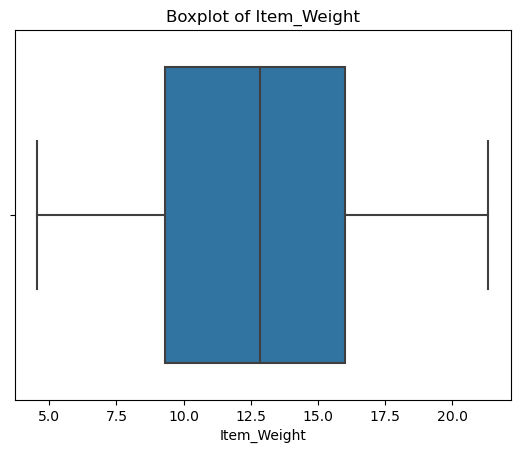

In [13]:
# after Impute missing value for Item_Weight column 
sns.boxplot(x='Item_Weight', data=df)
plt.title("Boxplot of Item_Weight")
plt.show()

In [14]:
get_unique_for = ['Item_Fat_Content','Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']
for column in get_unique_for:
    unique_values = df[column].unique()
    num_of_uniques = len(unique_values)
    print(f"Unique values in {column} column:")
    print(f"\t {num_of_uniques}")
    print(unique_values)
    print("-"*60)

Unique values in Item_Fat_Content column:
	 5
['Low Fat' 'Regular' 'low fat' 'LF' 'reg']
------------------------------------------------------------
Unique values in Item_Type column:
	 16
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
------------------------------------------------------------
Unique values in Outlet_Identifier column:
	 10
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
------------------------------------------------------------
Unique values in Outlet_Size column:
	 4
['Medium' nan 'High' 'Small']
------------------------------------------------------------
Unique values in Outlet_Location_Type column:
	 3
['Tier 1' 'Tier 3' 'Tier 2']
------------------------------------------------------------
Unique values in Outlet_Type column:
	 4
['Supermarket Type1'

### Observation:
1. Item_Fat_Content
    - 5 Unique values in Item_Fat_Content column: 'Low Fat' 'Regular' 'low fat' 'LF' 'reg'.  
    - however low fat , Low Fat and LF are the same  and Regular, reg are the same.
2. Outlet_Size
    - nan values

In [15]:
# Item_Fat_Content
df["Item_Fat_Content"].replace({'Low Fat': 'low', 'LF': 'low', 'Regular': 'regular', 'reg': 'regular'}, 
                               inplace=True)

# Display the unique values after the replacement
unique_values_after_replace = df["Item_Fat_Content"].unique()
num_of_uniques_after_replace = len(unique_values_after_replace)

print(f"Unique values in Item_Fat_Content column after replacement:")
print(f"\tNumber of unique values: {num_of_uniques_after_replace}")
print(unique_values_after_replace)

Unique values in Item_Fat_Content column after replacement:
	Number of unique values: 3
['low' 'regular' 'low fat']


In [16]:
# Outlet_Size
categorical_column = 'Outlet_Size'

# Check if there are missing values in the 'Outlet_Size' column
if df[categorical_column].isnull().any():
    mode_value = df[categorical_column].mode().iloc[0]
    df[categorical_column].fillna(mode_value, inplace=True)

# Verify if there are still any missing values in 'Outlet_Size' column
missing_values_after_imputation = df[categorical_column].isnull().sum()

# Print the result only if there were missing values before imputation
if missing_values_after_imputation > 0:
    print(f"Missing values in '{categorical_column}' column after imputation:")
    print(missing_values_after_imputation)
else:
    print(f"No missing values in '{categorical_column}' column.")

No missing values in 'Outlet_Size' column.


### Extracting the cleaned dataset for powerBI analysis

In [17]:
# exporting the df 
# df.to_csv('artifacts/powerBI/powerBI.csv', index=False)

In [18]:
get_unique_for = ['Item_Fat_Content','Item_Type', 'Outlet_Identifier', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']
for column in get_unique_for:
    unique_values = df[column].unique()
    num_of_uniques = len(unique_values)
    print(f"Unique values in {column} column:")
    print(f"\t {num_of_uniques}")
    print(unique_values)
    print("-"*60)

Unique values in Item_Fat_Content column:
	 3
['low' 'regular' 'low fat']
------------------------------------------------------------
Unique values in Item_Type column:
	 16
['Dairy' 'Soft Drinks' 'Meat' 'Fruits and Vegetables' 'Household'
 'Baking Goods' 'Snack Foods' 'Frozen Foods' 'Breakfast'
 'Health and Hygiene' 'Hard Drinks' 'Canned' 'Breads' 'Starchy Foods'
 'Others' 'Seafood']
------------------------------------------------------------
Unique values in Outlet_Identifier column:
	 10
['OUT049' 'OUT018' 'OUT010' 'OUT013' 'OUT027' 'OUT045' 'OUT017' 'OUT046'
 'OUT035' 'OUT019']
------------------------------------------------------------
Unique values in Outlet_Size column:
	 3
['Medium' 'High' 'Small']
------------------------------------------------------------
Unique values in Outlet_Location_Type column:
	 3
['Tier 1' 'Tier 3' 'Tier 2']
------------------------------------------------------------
Unique values in Outlet_Type column:
	 4
['Supermarket Type1' 'Supermarket Type2

In [19]:
# Select only numerical columns
numerical_columns = df.select_dtypes(include=['int', 'float']).columns
numerical_data = df[numerical_columns]

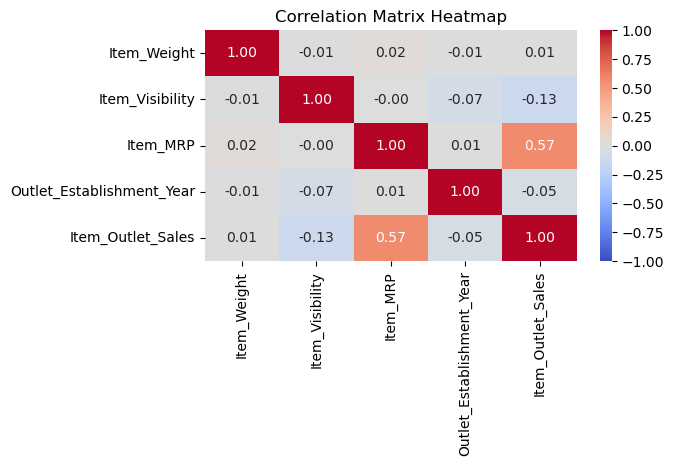

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns

corr_matrix = numerical_data.corr()

# Set up the matplotlib figure
plt.figure(figsize=(6,3))

# Create a heatmap with the mask applied and display values inside the cells
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)

plt.title('Correlation Matrix Heatmap')
plt.show()

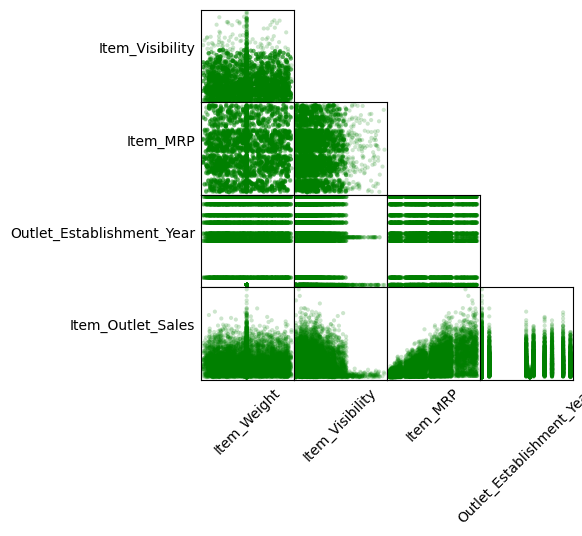

In [21]:
# Relationships
sm = pd.plotting.scatter_matrix(
    numerical_data,
    color='green', figsize=(6,6),alpha=0.2
)

# hiding ticks
for subaxis in sm:
    for ax in subaxis:
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        # rotate the label
        ax.xaxis.label.set_rotation(45)
        ax.yaxis.label.set_rotation(0)
        ax.yaxis.label.set_ha('right')
        
# hiding diagonal + one half of the matrix
for i in range(np.shape(sm)[0]):
    for j in range(np.shape(sm)[1]):
        if i <= j:
            sm[i,j].set_visible(False)
            
pic=sm[0][0].get_figure()

# 5. Data Preparation and Splitting

In [42]:
Xt = df.drop('Item_Outlet_Sales', axis=1)  # Features (input)
yt = df['Item_Outlet_Sales']  # Target variable

X,y = Xt, yt
# Label encoding for all categorical variables in X
label_encoder = LabelEncoder()

# Iterate over each column in X that is of object dtype
for column in X.select_dtypes(include=['object']).columns:
    X[column] = label_encoder.fit_transform(X[column])

In [44]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and testing data
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

# 6. Model Training and Evaluating

In [25]:
# defining evauation metrics

def get_metrics(y_true, predictions):
  mae = mean_absolute_error(y_true, predictions)
  mse = mean_squared_error(y_true, predictions)
  rmse = mean_squared_error(y_true, predictions)**0.5
  r2 = r2_score(y_true, predictions)

  print("="*50)
  print(f"MAE: {mae}")
  print(f"MSE: {mse}")
  print(f"RMSE: {rmse}")
  print(f"r2 Score: {r2}")
  print("="*50)

  # Return a dictionary containing the evaluation metrics.
  return {"mae": mae, "mse": mse, "rmse": rmse, "r2": r2}

### 6.1 Linear Regression

In [26]:
# Linear Regression
def lrm_train_test(scaled_X_train, y_train,scaled_X_test, y_test):
    lrm = LinearRegression()
    lrm.fit(scaled_X_train, y_train)
    lrm_preds = lrm.predict(scaled_X_test)
    lrm_metrics = get_metrics(y_test, lrm_preds)
    return (lrm, lrm_metrics)

In [27]:
lrm1, lrm1_metrics = lrm_train_test(scaled_X_train, y_train,scaled_X_test, y_test)

coefs_array = lrm1.coef_     # Get the coefficients of the model as a NumPy array
# Get the feature names
features = ['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type']

# Map the coefficients to the features using the zip() function
coefs_dict = dict(zip(features, coefs_array))

# Sort the coefficients dictionary in descending order by value
coefs_sorted = sorted(coefs_dict.items(), key=lambda x: x[1], reverse=True)

# Create a Pandas DataFrame from the coefficients dictionary
coefs_df = pd.DataFrame(coefs_sorted, columns=['Feature', 'Coefficient'])

# Print the DataFrame
print(coefs_df.to_string())

MAE: 854.9438156510537
MSE: 1291961.1216940647
RMSE: 1136.6446769743236
r2 Score: 0.524659547372325
                      Feature  Coefficient
0                    Item_MRP   976.452183
1                 Outlet_Type   690.278121
2           Outlet_Identifier   183.692827
3            Item_Fat_Content    33.165279
4             Item_Identifier     4.131440
5                   Item_Type     1.062225
6   Outlet_Establishment_Year    -6.067201
7                 Item_Weight   -10.829966
8             Item_Visibility   -80.535899
9        Outlet_Location_Type  -168.988510
10                Outlet_Size  -215.833603


### 6.2 XGBoost

In [28]:
xgb = XGBRegressor(random_state=20)
xgb.fit(scaled_X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=20, ...)

In [32]:
xgb_preds = xgb.predict(scaled_X_test)
print("Metrics for test data predictions")
xgb_test_metrics = get_metrics(y_test, xgb_preds)

Metrics for test data predictions
MAE: 791.2790763552011
MSE: 1292635.8223065021
RMSE: 1136.9414331030873
r2 Score: 0.5244113104175754


### 6.3 RandomForest

In [34]:
rf = RandomForestRegressor(random_state=20)
rf.fit(scaled_X_train, y_train)

RandomForestRegressor(random_state=20)

In [36]:
rf_preds = rf.predict(scaled_X_test)
rf_test_metrics = get_metrics(y_test, rf_preds)

MAE: 759.3286044961876
MSE: 1201644.7929586228
RMSE: 1096.1955997716022
r2 Score: 0.5578888790138857
